## Gasoline Mileage Performance for 32 Automobiles
### Simple linear regression

In [ ]:
from google.colab import files # comment this line if not running on google colab
uploaded= files.upload() # comment this line if not running on google colab

Saving gasoline.csv to gasoline.csv


In [ ]:
# importing libraries
import numpy as np
from scipy import optimize, stats
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

sns.set_style("darkgrid")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Understanding [Gasoline](https://www.oreilly.com/library/view/introduction-to-linear/9780470542811/22_app-b.html) data:

- y: Miles/gallon
- x1: Displacement (cubic in)
- x2: Horsepower (ft-lb)
- x3: Torque (ft-lb)
- x4: Compression ratio
- x5: Rear axle ratio
- x6: Carburetor (barrels)
- x7: No. of transmission speeds
- x8: Overall length (in.)
- x9: Width (in.)
- x10: Weight (lb)
- x11: Type of transmission (A = automatic, M = manual)


In [ ]:
# Reading data on google colab after uploading
#df = pd.read_excel(uploaded['gasoline.xls'])
df = pd.read_csv('gasoline.csv')

# Reading data on desktop/laptop
# df = pd.read_excel('gasoline.xls')

df.head()

,Automobile,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,Apollo,18.90,350.0,165,260.0,8.00,2.56,4,3,200.3,69.9,3910,A
1,Omega,17.00,350.0,170,275.0,8.50,2.56,4,3,199.6,72.9,3860,A
2,Nova,20.00,250.0,105,185.0,8.25,2.73,1,3,196.7,72.2,3510,A
3,Monarch,18.25,351.0,143,255.0,8.00,3.00,2,3,199.9,74.0,3890,A
4,Duster,20.07,225.0,95,170.0,8.40,2.76,1,3,194.1,71.8,3365,M


Let us first create a simple linear regression: $mile/gallon = f(displacement)$

$y = a_0 + a_1x_{1}+v$ where $v$ is modeling/experimental error/noise

In [ ]:
# creating target Y and predictor X 
X = df[['x1']]
X = sm.add_constant(X)
Y = df[['y']]
X.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,x1
0,1.0,350.0
1,1.0,350.0
2,1.0,250.0
3,1.0,351.0
4,1.0,225.0


In [ ]:
# Fitting parameters using ordinary least square OLS 
mod_simp = sm.OLS(Y, X)
mod_simp_fit = mod_simp.fit()
print('a0 = {}, a1 = {}\n'.format(mod_simp_fit.params[0], mod_simp_fit.params[1]))
print(mod_simp_fit.summary())

# Condition number in the table = np.sqrt(np.linalg.cond(X.T@X))

a0 = 33.722676685978136, a1 = -0.04735957791033174

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     101.7
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           3.74e-11
Time:                        03:52:14   Log-Likelihood:                -80.215
No. Observations:                  32   AIC:                             164.4
Df Residuals:                      30   BIC:                             167.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

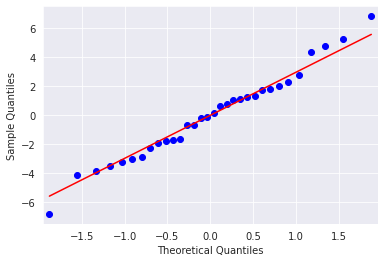

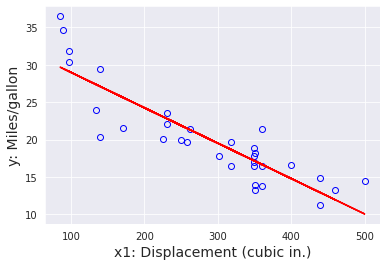

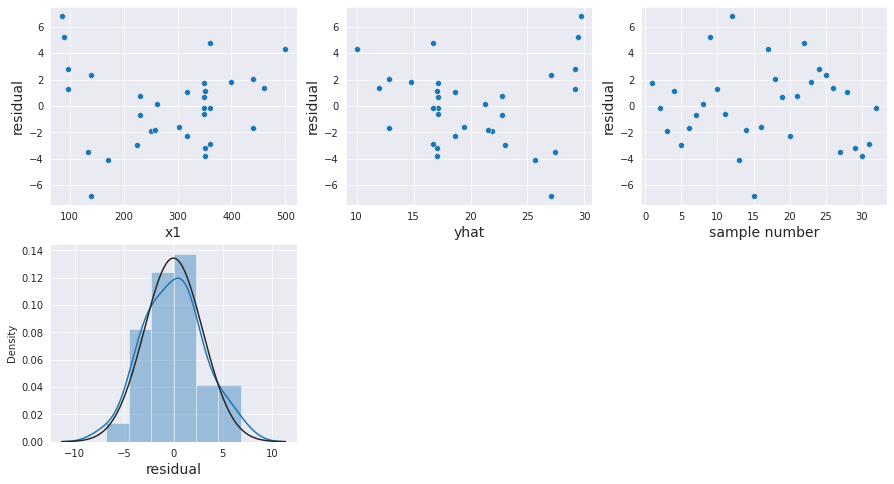

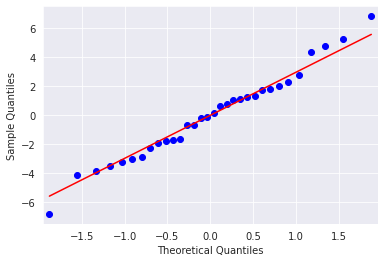

In [ ]:
# Plotting
plt.figure(num=1)
plt.plot(X.x1, Y.y, linestyle = "None", marker = "o", markerfacecolor = "None", color = "b")
plt.plot(X.x1, mod_simp_fit.predict(),'r')
plt.xlabel('x1: Displacement (cubic in.)', fontsize=14)
plt.ylabel('y: Miles/gallon', fontsize=14)

#sns.pairplot(X)
plt.figure(num=2, figsize=(15,8))


plt.subplot(2,3,1)
sns.scatterplot(X.x1, mod_simp_fit.resid)
plt.xlabel('x1', fontsize=14)
plt.ylabel('residual', fontsize=14)

plt.subplot(2,3,2)
sns.scatterplot(mod_simp_fit.predict(), mod_simp_fit.resid)
plt.xlabel('yhat', fontsize=14)
plt.ylabel('residual', fontsize=14)

plt.subplot(2,3,3)
sns.scatterplot(np.arange(1, df.shape[0]+1), mod_simp_fit.resid)
plt.xlabel('sample number', fontsize=14)
plt.ylabel('residual', fontsize=14)


plt.subplot(2,3,4)
sns.distplot(mod_simp_fit.resid, fit=stats.norm)
plt.xlabel('residual', fontsize=14)
# plt.tight_layout()

sm.qqplot(mod_simp_fit.resid,line='s')

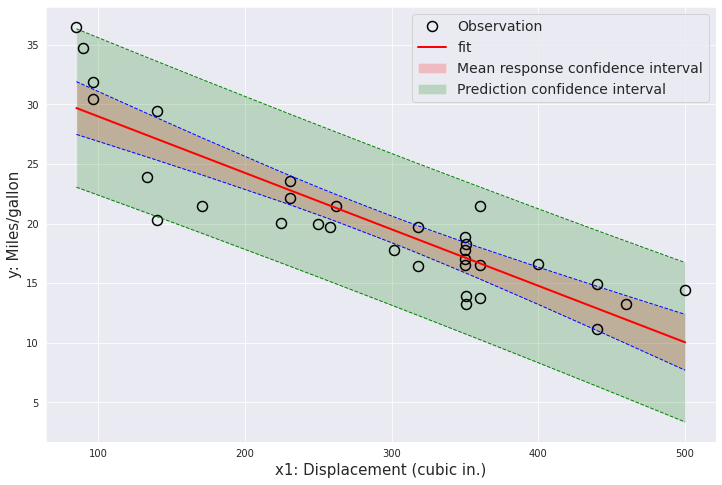

In [ ]:
from statsmodels.stats.outliers_influence import summary_table

dt = summary_table(mod_simp_fit, alpha = 0.05)[1]

# sorting to avoid issues while line plotting
x_arr = np.asanyarray(X.x1)
I = np.argsort(x_arr)
dt[:] = dt[I,:]
Xx1 = x_arr[I].copy()
yy = np.asanyarray(Y.y)[I].copy()

# prstd, iv_l, iv_u = wls_prediction_std(mod_simp_fit) # diff funct for Confidence intervals around the predictions

y_fit = dt[:, 2] # predicted value

y_fit_ci_lower = dt[:, 4] # CI of the mean response
y_fit_ci_upper = dt[:, 5]

y_pred_ci_lower = dt[:, 6] # CI of the predicted response
y_pred_ci_upper = dt[:, 7]

# Plot the CI's:
plt.figure(figsize=(12, 8))
plt.plot(Xx1, yy, linestyle = "None", marker = "o", markeredgewidth=1.5, markersize=10, markerfacecolor = "None", color = "black", label = 'Observation')
plt.plot(Xx1, y_fit, color = "red", label = 'fit', linewidth = 2)
plt.xlabel('x1: Displacement (cubic in.)', fontsize=15)
plt.ylabel('y: Miles/gallon', fontsize=15)
plt.plot(Xx1, y_fit_ci_lower, color = "blue", linestyle = "--", linewidth = 1)
plt.plot(Xx1, y_fit_ci_upper, color = "blue", linestyle = "--", linewidth = 1)
plt.fill_between(Xx1, y_fit_ci_lower, y_fit_ci_upper, facecolor='red', alpha=0.2, label = 'Mean response confidence interval')
plt.plot(Xx1, y_pred_ci_lower, color = "green", linestyle = "--", linewidth = 1)
plt.plot(Xx1, y_pred_ci_upper, color = "green", linestyle = "--", linewidth = 1)
plt.fill_between(Xx1, y_pred_ci_lower, y_pred_ci_upper, facecolor='g', alpha=0.2, label = 'Prediction confidence interval')
# plt.grid()
plt.legend(fontsize=14)
# plt.tight_layout()

---
#### Thanks

*Tutorial created by IIT Bombay as part of Upgrad course on Business Analytics*
- Om Prakash
- Updated: 6 March 2022
---